# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
from tqdm.notebook import tqdm
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip --no-check-certificate

--2021-10-26 17:28:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: <<data.txt.zip>>

100%[======================================>] 211,011,981  310KB/s   in 9m 56s 

2021-10-26 17:38:38 (346 KB/s) - <<data.txt.zip>> saved [211011981/211011981]



In [3]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [5]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
clf = Ridge(alpha=1e-3, normalize=True).fit(X_train, y_train)
ridge_predict = clf.predict(X_test)

Ошибка `Ridge` регрессии:

In [6]:
mean_squared_error(ridge_predict, y_test, squared=False)

9.510226042526984

Теперь посмотрим на константную модель:

In [7]:
mean_squared_error(np.ones(y_test.shape[0]) * y_train.mean(), y_test, squared=False)

10.85246390513634

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [8]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [9]:
set_random_seed(100500)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

## Исследование данных

Для начала посмотрим на данные

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [48]:
df.isnull().any().any()

False

Также необходимо посмотреть на распределение аудиотреков по годам

In [11]:
hist_data = pd.DataFrame(df.groupby([0]).size()).rename(columns={0: 'size'}).reset_index()
hist_data = hist_data.rename(columns={0: 'year'})

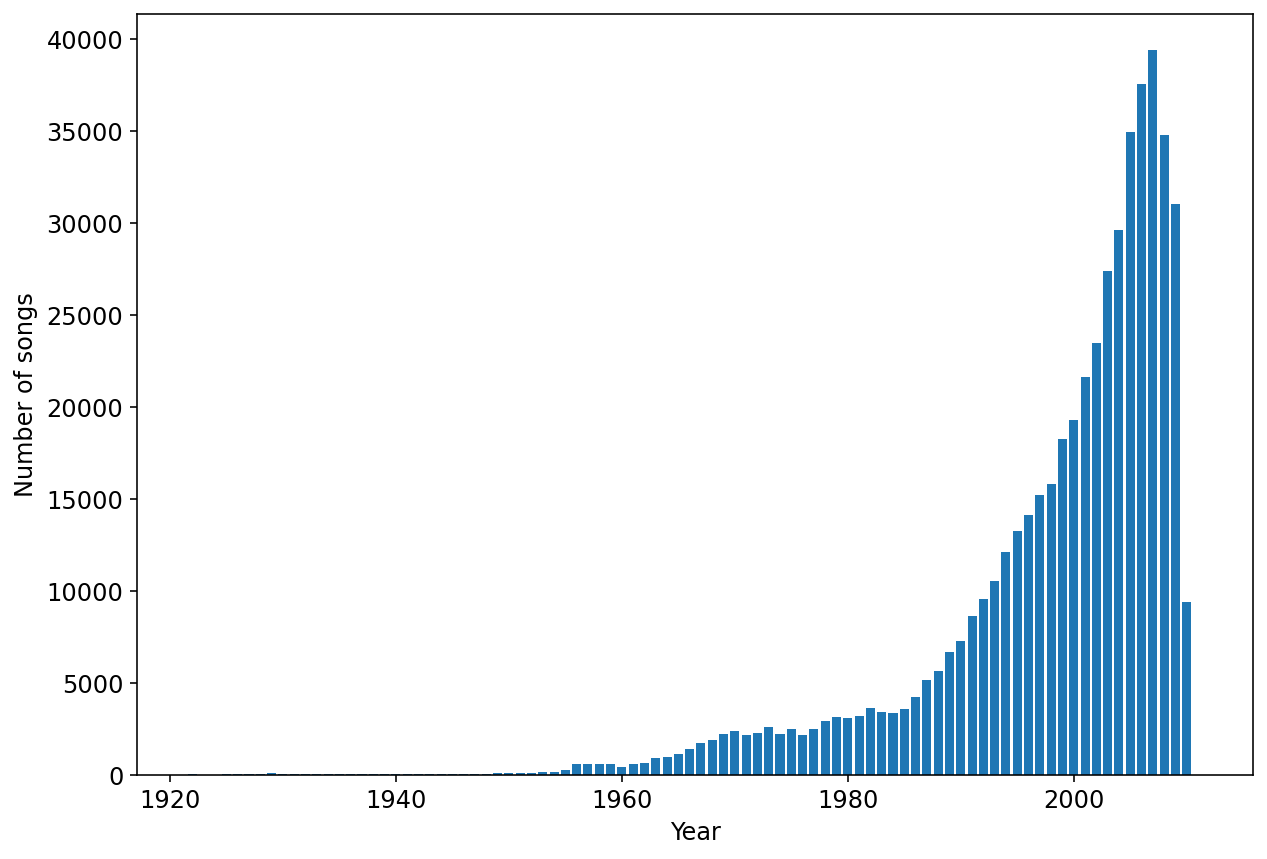

In [12]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12
plt.bar(hist_data['year'], hist_data['size'], align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.show()

Теперь посмотрим, есть ли какая-то корреляция между признаками и целевой переменной

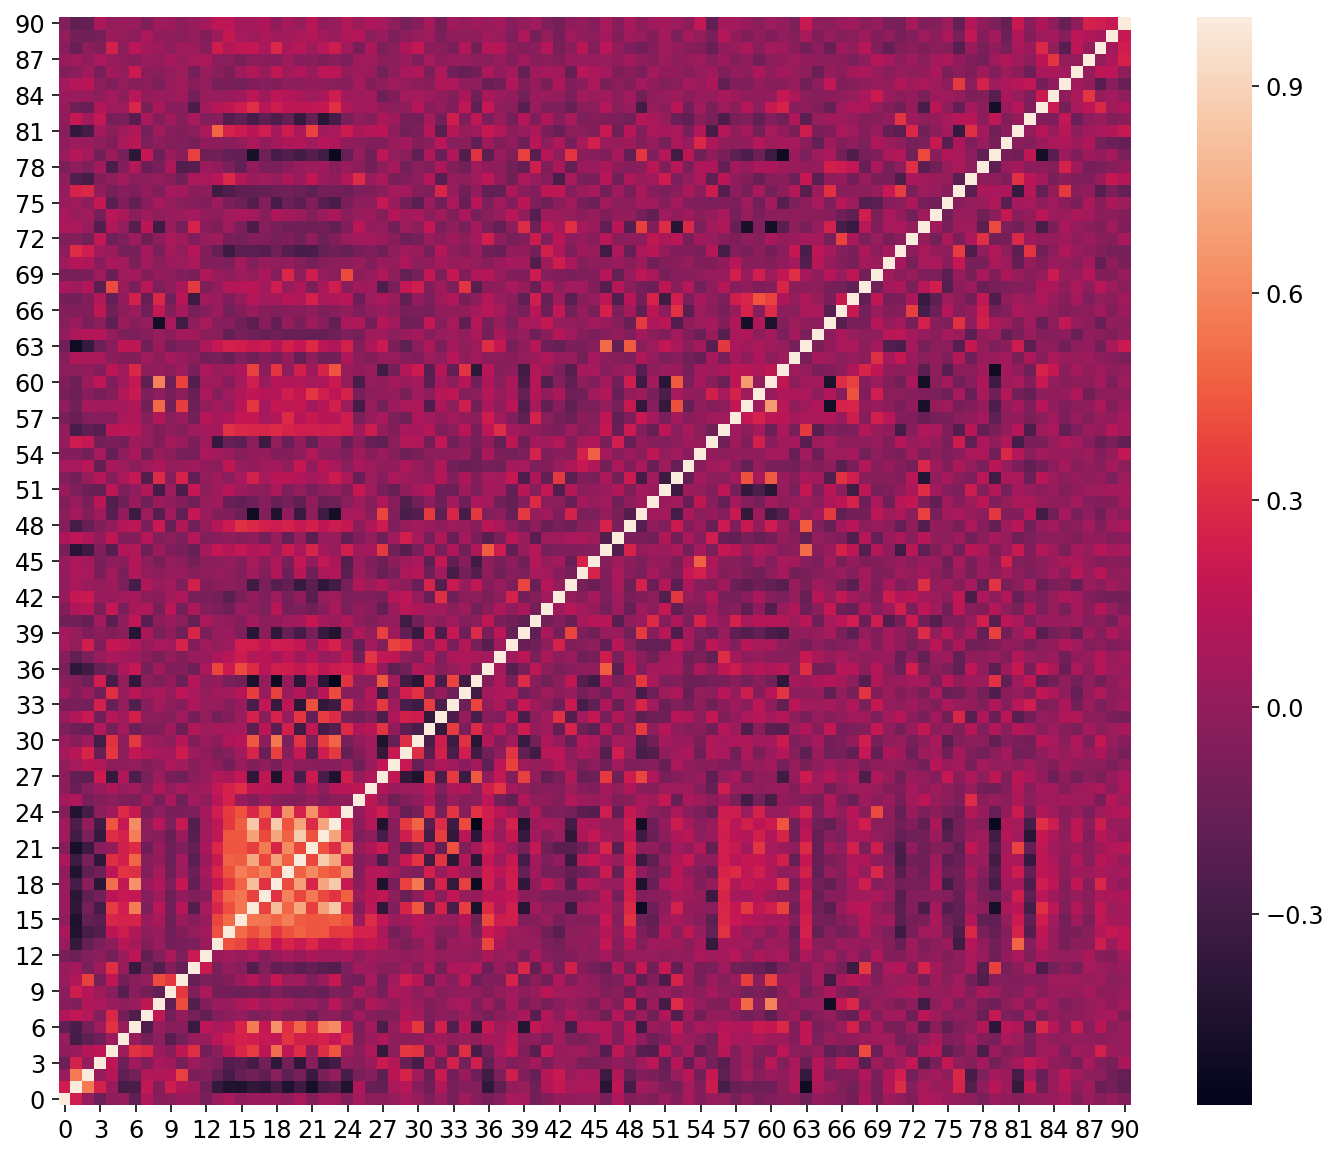

In [13]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['font.size'] = 12
ax = sns.heatmap(df.corr())
ax.invert_yaxis()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

По графику выше видно, что целевая переменная ни с какими признаками не имеет корреляции, хотя ее можно наблюдать между некоторыми парами признаков.

Попробуем тогда вычислить самую низкую и самую высокую по модулю корреляцию между признаками и цлевой переменной:

In [41]:
df.drop(columns=[0]).apply(lambda x: abs(x.corr(df[0]))).nsmallest(5)

43    0.000375
64    0.000396
82    0.002492
4     0.003286
19    0.004512
dtype: float64

In [42]:
df.drop(columns=[0]).apply(lambda x: abs(x.corr(df[0]))).nlargest(5)

1     0.225374
6     0.187443
3     0.139541
63    0.126348
40    0.123974
dtype: float64

В ячейках выше можно увидеть самые низкие и самые высокие значения модуля корреляции целевой переменной с признаками. Достаточно много признаков с околонулевой корреляцией, а модуль самой большого коэффициента корреляции не превышает значения 0.23. Из этого можно сделать вывод, что выкидывание признаков с самой низкой по модулю корреляцией вряд ли поможет.

В ячейке ниже была предпринята попытка такого эксперимента, но это не дало особых результатов. Подробнее об этом эксперименте можно прочитать в отчете.

In [15]:
# no_corr = [43, 64, 82, 4, 19, 80, 58, 71, 56, 15]
# X = df.drop(columns=no_corr).iloc[:, 1:].values
# y = df.drop(columns=no_corr).iloc[:, 0].values
# X_train = X[:train_size, :]
# y_train = y[:train_size]
# X_test = X[train_size:, :]
# y_test = y[train_size:]

## Модель

Сначала надо масштабировать данные. В первую очередь появилось масштабирование признаков, но этого не хватило, поэтому впоследствии было добавлено масштабирование таргета, которое, кстати, заметно улучшило результат.

In [16]:
scaler = StandardScaler(with_mean=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
target_scaler = StandardScaler(with_mean=True)
y_train = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = target_scaler.transform(y_test.reshape(-1, 1))

Параметры сети (ширина слоев, их количество, функции активации и тд) были подобраны в ходе проводимых экспериментов, по сути методом подбора - одно значение менялось и затем наблюдалось влияние этого изменения на качество модели.

In [32]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(90, 50)
        self.fc2 = nn.Linear(50, 55)
        self.fc3 = nn.Linear(55, 1)
        # self.dropout = nn.Dropout()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
# создание тренировочного датасета
train_set = torch.utils.data.TensorDataset(torch.from_numpy(X_train.astype(np.float32)), 
                                           torch.from_numpy(y_train.astype(np.float32)))
# создание тренировочного дадалоадера
# размер батча был подобран также методом подбора - практические любые значения выше и ниже давали плохой результат
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True) 

# создание тестового датасета
test_set = torch.utils.data.TensorDataset(torch.from_numpy(X_test.astype(np.float32)), 
                                          torch.from_numpy(y_test.astype(np.float32)))
# создание тестового даталоадера
test_loader = torch.utils.data.DataLoader(test_set, batch_size=200, shuffle=True)

model = Model()
# ниже варианты оптимайзеров, не закомментирован лучший из них
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)
optimizer1 = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
# optimizer2 = torch.optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.01, momentum=0.05)
criterion = F.mse_loss

В ячейке ниже есть подключение к wandb, можно залогиниться и отсматривать графики. Чтобы активизировать wandb, при вызове функции train нужно дописать True в конец входов.

In [20]:
# # !pip install wandb --upgrade --quiet
# import wandb

# # логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
# wandb.login()
# # инициализируем проект
# wandb.init(project="pytorch-another_try_hw1", entity='kat_notkate')
# # сохраняем параметры сетки в wandb + просим следить за градиентами сетки
# wandb.watch(model);
# # wandb.finish()

Функция ниже принимает на вход списки train и test, в которых содержатся средние ошибки за каждую эпоху обучения. Она запучкается в конце функции train.

In [21]:
def plot(train, test):
    %config InlineBackend.figure_format = 'retina'
    plt.rcParams['figure.figsize'] = 10, 7
    plt.rcParams['font.size'] = 12
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'r-', label='train');
    plt.plot(epochs, test, 'b-', label='test');
    plt.xlabel('Epoch');
    plt.ylabel('RMSE');
    plt.legend();
    plt.show();

In [22]:
def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, wandb_state=False):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    test_losses = []
    train_losses = []
    for epoch in range(num_epochs):
        train_loss = []
        for x_train, y_train_ in tqdm(train_loader):
            y_pred = model(x_train)
            loss = criterion(y_pred, y_train_)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # тут таргет и предсказание обратно масштабируются, считается лосс и добавляется в список для подсчета среднего
            model.eval()
            train_loss.append(criterion(torch.tensor(target_scaler.inverse_transform(model(x_train).detach().numpy())), 
                                        torch.tensor(target_scaler.inverse_transform(y_train_))))
            model.train()

        test_loss = []
        model.eval()
        with torch.no_grad():
            for x_val, y_val_ in tqdm(test_loader):
                y_pred = model(x_val)
                
                # будем добавлять в список loss, уже пересчитанный обратно в нужный нам масштаб
                test_loss.append(criterion(torch.tensor(target_scaler.inverse_transform(y_pred)), 
                                           torch.tensor(target_scaler.inverse_transform(y_val_))))
        model.train()
        
        train_losses.append(np.mean(train_loss)**(1/2))
        test_losses.append(np.mean(test_loss)**(1/2))
        
        # скидываем метрики на wandb, если надо
        if wandb_state:
            wandb.log({"mean test loss": test_losses[-1]})
            wandb.log({"mean train loss": train_losses[-1]})

        # печатаем метрики
        print(f"Epoch: {epoch + 1}, test_loss: {test_losses[-1]}")
        print(f"Epoch: {epoch + 1}, train_loss: {train_losses[-1]}")
        
    # выводим графики динамики ошибок
    plot(train_losses, test_losses)

def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    model.eval()
    with torch.no_grad():
        losses = []
        for x_val, y_val_ in tqdm(test_loader):
            predicts = model(x_val)
            losses.append(criterion(torch.tensor(target_scaler.inverse_transform(predicts)), 
                                    torch.tensor(target_scaler.inverse_transform(y_val_))))
    
    print(f'Loss: {np.mean(losses)**(1/2)}')
    model.train()
    return predicts

AdamW optimization:


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 1, test_loss: 9.050912328436885
Epoch: 1, train_loss: 9.339281729744481


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 2, test_loss: 8.933282030252446
Epoch: 2, train_loss: 8.916884755352307


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 3, test_loss: 8.903005336869136
Epoch: 3, train_loss: 8.807348598940644


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 4, test_loss: 8.889279335771546
Epoch: 4, train_loss: 8.74170225976826


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 5, test_loss: 8.880946786256096
Epoch: 5, train_loss: 8.696895650605423


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 6, test_loss: 8.867450780783019
Epoch: 6, train_loss: 8.661873543506127


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 7, test_loss: 8.841026506849994
Epoch: 7, train_loss: 8.63689718834213


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 8, test_loss: 8.833521667008233
Epoch: 8, train_loss: 8.61501275821567


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 9, test_loss: 8.824552045913444
Epoch: 9, train_loss: 8.595794323604476


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 10, test_loss: 8.817575710956897
Epoch: 10, train_loss: 8.579684867851535


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 11, test_loss: 8.825263986070226
Epoch: 11, train_loss: 8.564535302841204


  0%|          | 0/7246 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch: 12, test_loss: 8.80574588456288
Epoch: 12, train_loss: 8.551890239014778


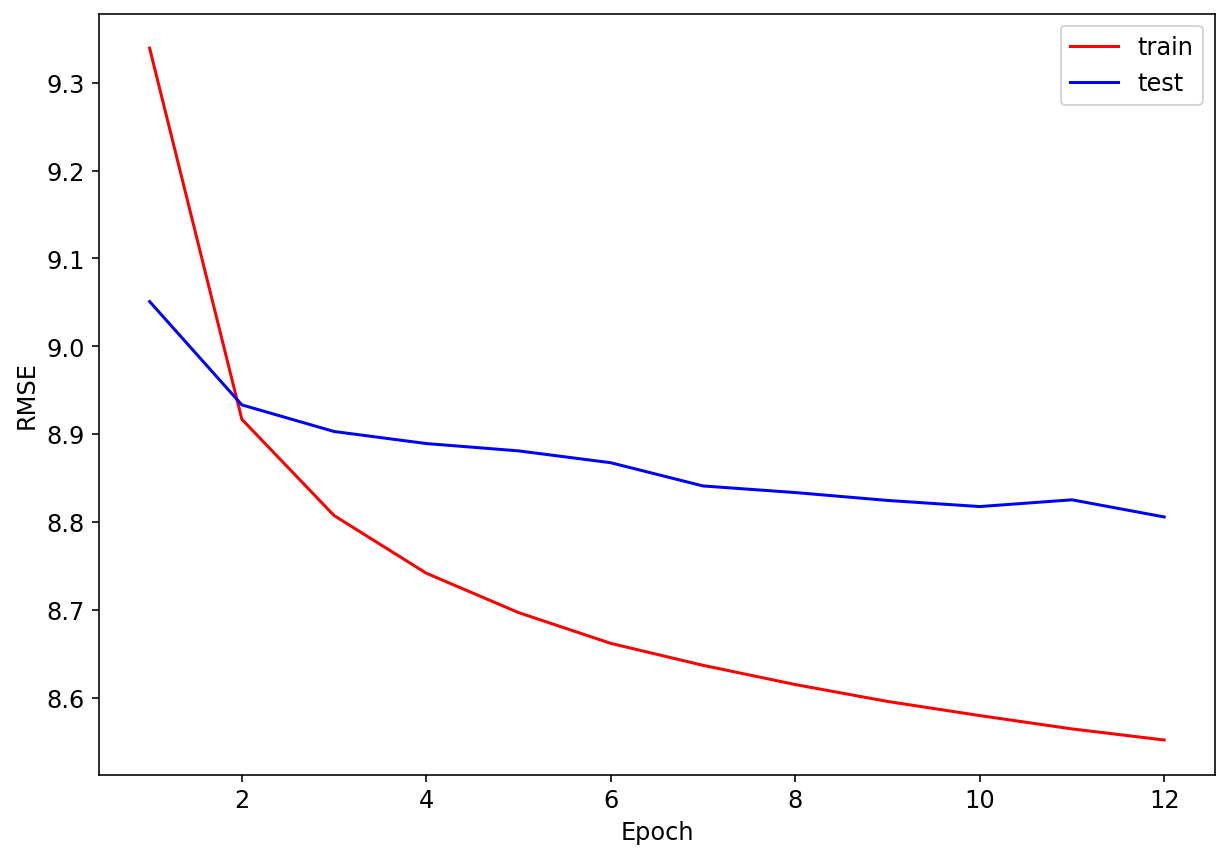

In [44]:
print('AdamW optimization:')
train(model, optimizer1, criterion, train_loader, test_loader, 12)

In [45]:
testing_loader = torch.utils.data.DataLoader(test_set, batch_size=X_test.shape[0], shuffle=True)

In [46]:
assert test(model, criterion, testing_loader).shape[0] == y_test.shape[0]

  0%|          | 0/1 [00:00<?, ?it/s]

Loss: 8.805718592576111


## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

## Отчет

**Первый эксперимент**

Для начала был проведен эксперимент с разными методами масштабирования:
* MaxAbsScaler,
* MinMaxScaler,
* StandardScaler.

Наилучшие результаты показал, конечно, StandardScaler, но в целом остальные скейлеры тоже неплохо справлялись и давали достаточно адекватный результат.

**Второй эксперимент**

Параллельно с подбором лучшего масштабирования было подобрано количество полносвязных слоев и их ширина. Сначлаа слоев было всего два с шириной (90, 150) и (150, 1) - хороших результатов это не давало, поэтому было принято решение попробовать сделать сеть с тремя полносвязными слоями. Сначала это не давало результатов, но потом оказалось, что такая сеть достаточно неплохо уменьшает ошибку. Что касается ширины слоев -  там все еще фигурировали числа в районе 100 и выше, и, как оказалось позднее, это вызывало переобучение (то есть ошибка на тренировочной выборке в рандомные моменты росла), поэтому, постепенно сокращая ширину слоев, я пришла к числам, указанным в модели в Задании 2. Также в какой-то момент была предпринята попытка вставить nn.Dropout() после первого слоя и нелинейности, но это не дало каких-то ощутимых результатов, а впоследствии, после удаления дропаута, модель наоборот стала лучше работать.

**Третий эксперимент**

В качестве третьего эксперимента могу указать изменения значения гиперпараметров. Наиболее оптимальное значение параметра lr - 0.0001, причем его изменение (в любую сторону) хотя бы на 0.00001 ухудшало результат. Слишком большой коэффициет L2-регуляризации приводил к тому, что модель увеличивала ошибку на тестовой выборке, а полное отсутствие этого коэффициента приводило к переобучению (то есть снова ошибка на тренировочной выборке росла)

**Четвертый эксперимент**

Еще в качестве отдельного эксперимента можно выделить подбор метода оптимизации. С самого начала было принято решение использовать Adam и подбирать под него параметры и гиперпараметры, но потом все-таки попробовала AdamW и SGD. Лучший результат показал AdamW - минимальная ошибка оказывалась в районе 8.80, на вотором месте Adam с ошибкой повыше примерно на две-четыре сотые года, а последнее место занял SGD с ошибкой около 9.1, но на ее достижение потребовалось примерно в три раза больше эпох (то есть порядка 30). При этом при обучении на SGD ошибка на тесте падала гораздо более стабильно, чем при обучениях другими методами. в конечном варианте остался только AdamW.

**Пятый эксперимент**

Одним из вариантов, который мог бы как-то улучшить качество модели и упростить обучение был выбросить признаки с околонулевой корреляцией с целевой переменной. В результате качество модели не выросло, а упало, хотя и несильно (ошибка была примерно на единицу выше, чем со всеми признаками при тех же параметрах).

**В общих чертах**

По большей части эксперименты проводились непоследовательно, к некоторым даже приходилось возвращаться повторно, когда модель показывала лучшие результаты по другим причинам. 

Самыми прорывными идеями, которые радикально уменьшили ошибку, оказались: 
1) масштабирование признаков - ошибка резко упала со значение около 1100 примерно до сотни 
2) масштабирование целевой переменной - модель тут же начала выдавать адекватные ответы, то есть ошибка примерно в сотню лет, снизилась к ошибкам в районе 10
3) мне сразу не пришло в голову, но это очень помогло - считать ошибку на тренировочной выборке, ведь при правильно работающей модели она должна постоянно уменьшаться, а на большинстве моделей в первых экспериментах она в какой-то момент начинала либо расти, либо болтаться туда-сюда, что говорило о переобучении. От этого спасло сужение слоев и добавление регуляризации.

Перечисленные выше преобразования очень упростили дальнейшую работу: на адекватно работающей модели оказалось проще подбирать гиперпараметры, потому что при изменении одного из них даже на небольшое значение становилось понятно, модель становится лучше или хуже или все дело в переобучении.

Еще выяснилось, что лучше работает обучение с меньшими слоями и меньшим параметром регуляризации, чем с большими слоями и большим параметром - во втором случае ошибка отказывалась опускаться ниже 9.

Как уже упоминалось раньше, стохастический градиентный спуск опускает ошибку более расномерно, но чтобы дойти до адекватных значений, ему надо пройти очень много эпох, поэтому было принято решение попробовать объединить лучший оптимизатор - AdamW - и SGD. Так и получилось - AdamW хорошо снизил ошибку, а SGD как бы придавил сверху.

**Вывод**

В данной работе лучшие результаты показали две модели

Первая: сеть состояла из трех слоев - (90, 50) -> (50, 55) -> (55, 1) с функцией активации ReLU - опитимизация проводилась с помощью AdamW с параметрами lr=0.0001, weight_decay=0.01 в течение 12 эпох.

Вторая: сама сеть осталась точно такой же, первый этап оптимизации проводился так же, но в течение 9 эпох, а следующие три эпохи была оптимизация с помощью SGD с теми же параметрами и momentum=0.05, но это примерно то же самое, что и первая модель, поэтому в качестве финальной все равно выбрана первая.

## Ссылки на источники кода

* код внутри функции train, test, а также код создания самой сети - [тетрадка с первого семинара](https://github.com/hse-ds/iad-deep-learning/blob/master/2021/seminars/sem01/sem01.ipynb)
* [идея для графика лоссов](https://www.kaggle.com/raghav1810/release-year-prediction-on-msd-using-neural-nets)